In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter
from sklearn.ensemble import RandomForestRegressor,AdaBoostClassifier,BaggingClassifier
from sklearn.utils import resample
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("../../Data/water_potability.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [3]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [4]:
data= data.dropna()

In [5]:
zero  = data[data['Potability']==0]   #zero values in Potability column
one = data[data['Potability']==1]  # one values in Potability column
#minority class that  is 1, we need to upsample/increase that class so that there is no bias
#n_samples = 1998 means we want 1998 sample of class 1, since there are 1998 samples of class 0
df_minority_upsampled = resample(one, replace = True, n_samples = 1200) 
#concatenate
df = pd.concat([zero, df_minority_upsampled])

from sklearn.utils import shuffle
df = shuffle(df) # shuffling so that there is particular sequence
df

X_df = df.drop(columns="Potability")
y_df = df.Potability
x_train_df,x_test_df,y_train_df,y_test_df = train_test_split(X_df,y_df,random_state=42,test_size=.25,shuffle=True)

<AxesSubplot:>

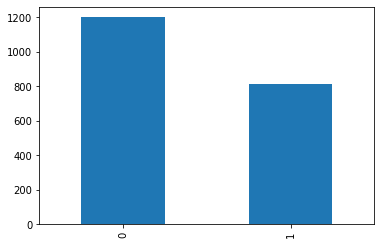

In [6]:
data.Potability.value_counts().plot(kind ='bar')

In [7]:
X = data.drop(columns="Potability")
X


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425
...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712


In [8]:
y = data.Potability
y

3       0
4       0
5       0
6       0
7       0
       ..
3267    1
3268    1
3269    1
3270    1
3271    1
Name: Potability, Length: 2011, dtype: int64

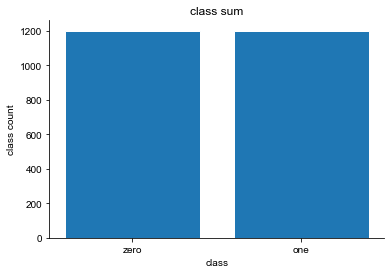

In [9]:
sm = SMOTE(random_state=2)
X_res, Y_res = sm.fit_resample(X,y.ravel())
c = Counter(Y_res)
y = [c[0],c[1]]
x = ["zero","one"]
plt.title("class sum") # 圖的標題
plt.xlabel("class") 
plt.ylabel("class count")
sns.set(style = "white") 
sns.despine(top = True, right = True)  
plt.bar(x, y) 
plt.show()

<AxesSubplot:xlabel='ph', ylabel='Hardness'>

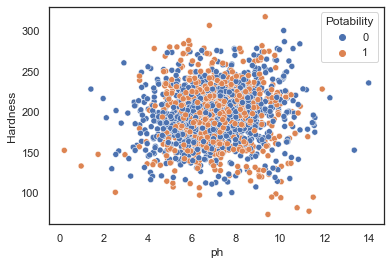

In [10]:
sns.scatterplot(x="ph", y="Hardness", hue="Potability",
data=data)

In [11]:
x_train,x_test,y_train,y_test = train_test_split(X_res,Y_res,random_state=42,test_size=.25)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

<AxesSubplot:>

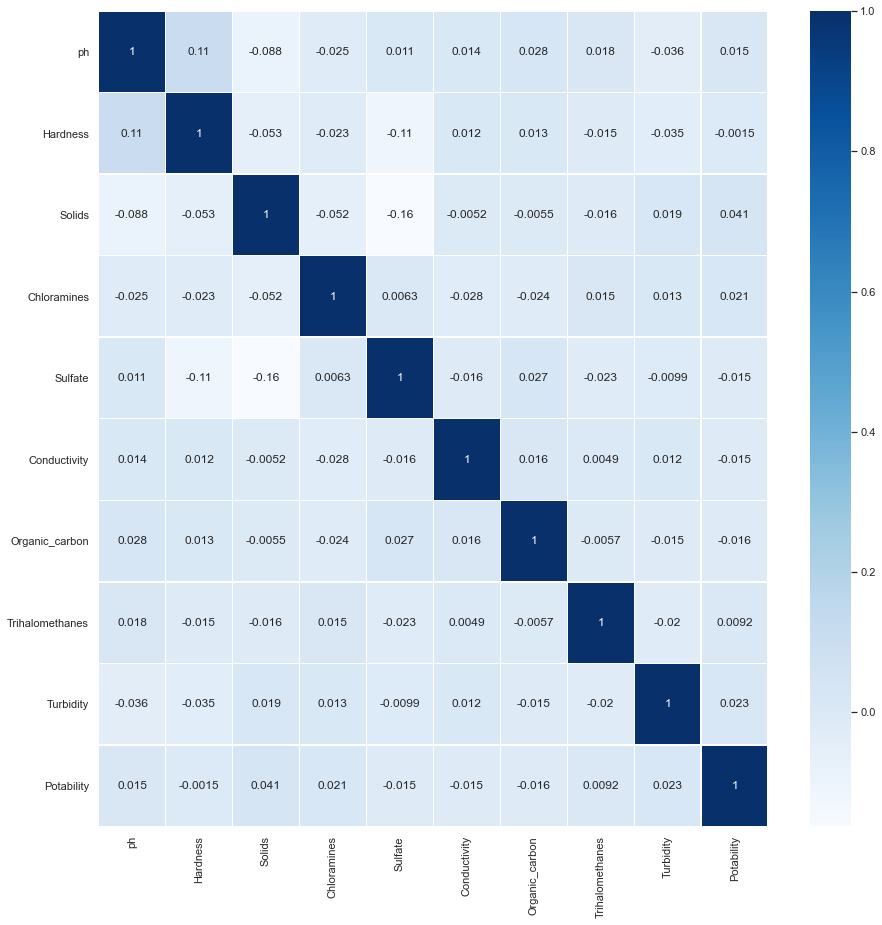

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), cmap='Blues',linewidths=.5,annot=True)

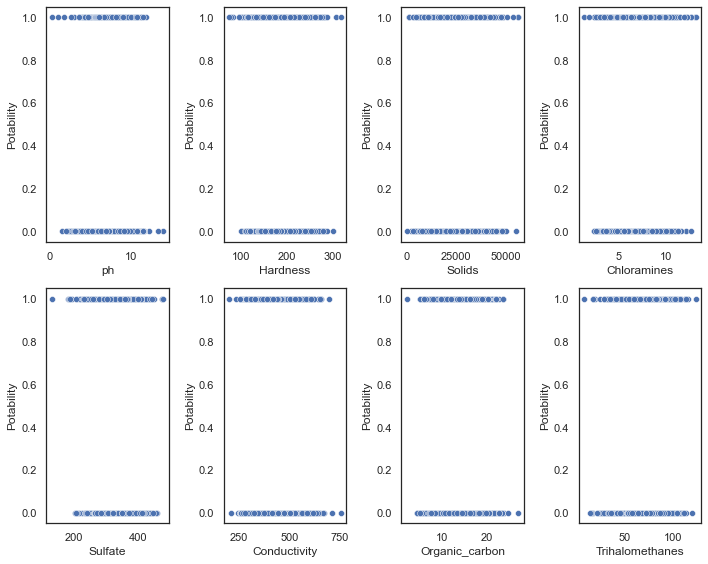

In [13]:
fig, ax=plt.subplots(2,4, figsize=(10,8))
for col, axis in zip(X.columns, ax.ravel()):
    sns.scatterplot(x=col, y="Potability", data=data, ax=axis)
plt.tight_layout()

In [14]:
knn = KNeighborsClassifier()
para_knn = {'n_neighbors':np.arange(1, 50)}  #parameters of knn
grid_knn = GridSearchCV(knn, param_grid=para_knn, cv=5)
grid_knn.fit(x_train, y_train)
print("Best parameters for KNN:", grid_knn.best_params_)

Best parameters for KNN: {'n_neighbors': 1}


In [15]:
rfr = RandomForestClassifier()
params_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
grid_rf = GridSearchCV(rfr, param_grid=params_rf, cv=5)
grid_rf.fit(x_train, y_train)
print("Best parameters for RandomForestClassifier:", grid_rf.best_params_)

Best parameters for RandomForestClassifier: {'min_samples_leaf': 2, 'n_estimators': 350}


In [16]:
logistic_regr = LogisticRegression()
logistic_regr.fit(x_train,y_train)
score = logistic_regr.score(x_test, y_test)
y_pred = logistic_regr.predict(x_test)
conf = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)
print(score)
print(conf)
print(clf_report)

0.4866666666666667
[[165 117]
 [191 127]]
              precision    recall  f1-score   support

           0       0.46      0.59      0.52       282
           1       0.52      0.40      0.45       318

    accuracy                           0.49       600
   macro avg       0.49      0.49      0.48       600
weighted avg       0.49      0.49      0.48       600



In [17]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
score = knn.score(x_test,y_test)
y_pred = knn.predict(x_test)
conf = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)
print(score)
print(conf)
print(clf_report)

0.6916666666666667
[[188  94]
 [ 91 227]]
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       282
           1       0.71      0.71      0.71       318

    accuracy                           0.69       600
   macro avg       0.69      0.69      0.69       600
weighted avg       0.69      0.69      0.69       600



In [18]:
rfr = RandomForestClassifier(n_estimators=200, min_samples_leaf=2, random_state=42)
rfr.fit(x_train,y_train)
score = rfr.score(x_test,y_test)
y_pred = rfr.predict(x_test)
conf = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)
print(score)
print(conf)
print(clf_report)

0.6733333333333333
[[208  74]
 [122 196]]
              precision    recall  f1-score   support

           0       0.63      0.74      0.68       282
           1       0.73      0.62      0.67       318

    accuracy                           0.67       600
   macro avg       0.68      0.68      0.67       600
weighted avg       0.68      0.67      0.67       600



In [19]:
ada = AdaBoostClassifier(n_estimators= 600, learning_rate= 1 )
ada.fit(x_train,y_train)
score = ada.score(x_test,y_test)
print(score)

0.5633333333333334


In [20]:
bagging = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=46, min_samples_leaf=2, random_state=42),
                           n_estimators = 100, random_state = 42)
bagging.fit(x_train, y_train)
score = bagging.score(x_test,y_test)
y_pred = bagging.predict(x_test)
conf = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)
print(score)
print(conf)
print(clf_report)

0.665
[[197  85]
 [116 202]]
              precision    recall  f1-score   support

           0       0.63      0.70      0.66       282
           1       0.70      0.64      0.67       318

    accuracy                           0.67       600
   macro avg       0.67      0.67      0.66       600
weighted avg       0.67      0.67      0.67       600



In [21]:
#random sampling data
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train_df,y_train_df)
score = knn.score(x_test_df,y_test_df)
y_pred = knn.predict(x_test_df)
conf = confusion_matrix(y_test_df, y_pred)
clf_report = classification_report(y_test_df, y_pred)
print(score)
print(conf)
print(clf_report)

0.7616666666666667
[[203  97]
 [ 46 254]]
              precision    recall  f1-score   support

           0       0.82      0.68      0.74       300
           1       0.72      0.85      0.78       300

    accuracy                           0.76       600
   macro avg       0.77      0.76      0.76       600
weighted avg       0.77      0.76      0.76       600



In [22]:
#Deep Learning
model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(units=9,input_shape=(1,9),activation='sigmoid'),
     tf.keras.layers.Dense(units=12,activation="sigmoid"),
      tf.keras.layers.Dense(units=2,activation="softmax")
    ])
model.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy'])

model.summary()
y_train_test = np.array([[i] for i in y_train])
y_test_test = np.array([[i] for i in y_test])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1, 9)              90        
_________________________________________________________________
dense_1 (Dense)              (None, 1, 12)             120       
_________________________________________________________________
dense_2 (Dense)              (None, 1, 2)              26        
Total params: 236
Trainable params: 236
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(x_train, y_train_test,batch_size=100,epochs=600,verbose=2,shuffle=True)
model.evaluate(x_test,y_test_test)

Epoch 1/600
18/18 - 0s - loss: 1.1072 - accuracy: 0.4900
Epoch 2/600
18/18 - 0s - loss: 0.9775 - accuracy: 0.4900
Epoch 3/600
18/18 - 0s - loss: 0.8748 - accuracy: 0.4900
Epoch 4/600
18/18 - 0s - loss: 0.7998 - accuracy: 0.4900
Epoch 5/600
18/18 - 0s - loss: 0.7500 - accuracy: 0.4900
Epoch 6/600
18/18 - 0s - loss: 0.7204 - accuracy: 0.4900
Epoch 7/600
18/18 - 0s - loss: 0.7049 - accuracy: 0.4894
Epoch 8/600
18/18 - 0s - loss: 0.6979 - accuracy: 0.4867
Epoch 9/600
18/18 - 0s - loss: 0.6951 - accuracy: 0.4728
Epoch 10/600
18/18 - 0s - loss: 0.6941 - accuracy: 0.4767
Epoch 11/600
18/18 - 0s - loss: 0.6938 - accuracy: 0.5000
Epoch 12/600
18/18 - 0s - loss: 0.6937 - accuracy: 0.5078
Epoch 13/600
18/18 - 0s - loss: 0.6936 - accuracy: 0.5128
Epoch 14/600
18/18 - 0s - loss: 0.6936 - accuracy: 0.5133
Epoch 15/600
18/18 - 0s - loss: 0.6935 - accuracy: 0.5150
Epoch 16/600
18/18 - 0s - loss: 0.6935 - accuracy: 0.5144
Epoch 17/600
18/18 - 0s - loss: 0.6935 - accuracy: 0.5139
Epoch 18/600
18/18 - 0s

Epoch 135/600
18/18 - 0s - loss: 0.6932 - accuracy: 0.4706
Epoch 136/600
18/18 - 0s - loss: 0.6932 - accuracy: 0.4739
Epoch 137/600
18/18 - 0s - loss: 0.6932 - accuracy: 0.4728
Epoch 138/600
18/18 - 0s - loss: 0.6932 - accuracy: 0.4694
Epoch 139/600
18/18 - 0s - loss: 0.6932 - accuracy: 0.4711
Epoch 140/600
18/18 - 0s - loss: 0.6932 - accuracy: 0.4700
Epoch 141/600
18/18 - 0s - loss: 0.6932 - accuracy: 0.4689
Epoch 142/600
18/18 - 0s - loss: 0.6932 - accuracy: 0.4689
Epoch 143/600
18/18 - 0s - loss: 0.6932 - accuracy: 0.4683
Epoch 144/600
18/18 - 0s - loss: 0.6932 - accuracy: 0.4706
Epoch 145/600
18/18 - 0s - loss: 0.6932 - accuracy: 0.4728
Epoch 146/600
18/18 - 0s - loss: 0.6932 - accuracy: 0.4722
Epoch 147/600
18/18 - 0s - loss: 0.6932 - accuracy: 0.4728
Epoch 148/600
18/18 - 0s - loss: 0.6932 - accuracy: 0.4706
Epoch 149/600
18/18 - 0s - loss: 0.6932 - accuracy: 0.4661
Epoch 150/600
18/18 - 0s - loss: 0.6932 - accuracy: 0.4717
Epoch 151/600
18/18 - 0s - loss: 0.6932 - accuracy: 0.47

Epoch 274/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4739
Epoch 275/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4706
Epoch 276/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4744
Epoch 277/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4744
Epoch 278/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4728
Epoch 279/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4678
Epoch 280/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4744
Epoch 281/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4744
Epoch 282/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4656
Epoch 283/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4694
Epoch 284/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4717
Epoch 285/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4717
Epoch 286/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4661
Epoch 287/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4661
Epoch 288/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4817
Epoch 289/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4761
Epoch 290/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.47

Epoch 413/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4656
Epoch 414/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4656
Epoch 415/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4672
Epoch 416/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4656
Epoch 417/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4700
Epoch 418/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4600
Epoch 419/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4717
Epoch 420/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4689
Epoch 421/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4600
Epoch 422/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4650
Epoch 423/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4667
Epoch 424/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4644
Epoch 425/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4611
Epoch 426/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4767
Epoch 427/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4611
Epoch 428/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4778
Epoch 429/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.45

Epoch 552/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4550
Epoch 553/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4722
Epoch 554/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4711
Epoch 555/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4628
Epoch 556/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4606
Epoch 557/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4756
Epoch 558/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4628
Epoch 559/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4572
Epoch 560/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4650
Epoch 561/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4811
Epoch 562/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4739
Epoch 563/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4683
Epoch 564/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4728
Epoch 565/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4739
Epoch 566/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4750
Epoch 567/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.4661
Epoch 568/600
18/18 - 0s - loss: 0.6931 - accuracy: 0.46

[0.6931469440460205, 0.4833333194255829]